生データの軽量化
まずは1000個に1つサンプリングしてみる

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import time


reader = pd.read_csv("earthquake/train.csv",chunksize=10e+3,nrows=10e+8)


In [210]:
def pick_1stone(df):
    return df[0:1]

In [211]:
df = pd.concat((pick_1stone(r) for r in reader), ignore_index=True)

In [215]:
df.to_csv("earthquake/train_1000to1.csv")

今後はこの軽量化したcsvを使う

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import time

df = pd.read_csv("earthquake/train_1000to1.csv")
df = df.drop("Unnamed: 0",axis=1)

In [223]:
df.head(4)

,acoustic_data,time_to_failure
0,12,1.469100
1,2,1.466998
2,8,1.464896
3,8,1.461699


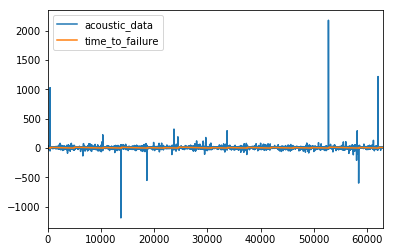

In [224]:
df.plot()

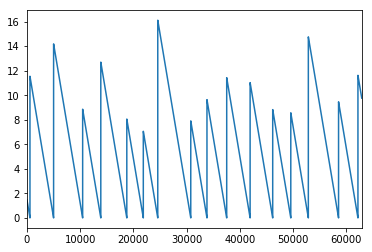

In [225]:
df["time_to_failure"].plot()

# データの分割

In [230]:
test_ratio = 0.1
test_size = int(df["acoustic_data"].count() * test_ratio)
train_size = int(df["acoustic_data"].count() * (1-test_ratio))
df_train = df[0:train_size]
df_test = df[train_size:]

# 履歴行列とテスト行列の構成

<function matplotlib.pyplot.show(*args, **kw)>

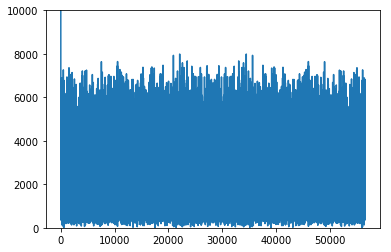

In [247]:
from scipy.fftpack import fft
y=fft(df_train["acoustic_data"].values)
plt.plot(abs(y))
#plt.xlim([0,10000])
plt.ylim([0,10000])
plt.show

# 特異スペクトル分解

# 異常度の計算

# 異常度と`time_to_failure`の関係